In [25]:
import numpy as np
import modred as mr
import os
import matplotlib
matplotlib.use('TkAgg')  # Specify the backend
import matplotlib.pyplot as plt
from matplotlib import cm

import data_analysis
import importlib
importlib.reload(data_analysis)

%matplotlib inline
matplotlib.pyplot.rc('text', usetex=True)

fontsize = 18


In [26]:
from data_analysis import Simulation
current_directory = '/home/julielimonet/Documents/Stage_M2/'

simulation = Simulation(current_directory)
time, x, z, u, w, T, umean, wmean = simulation.import_data()

simulation.ticks = [-0.04, 0, 0.05, 0.10, 0.15]

h, l = np.shape(x)
m = len(time)

# $<u(z)>_x (t)$

## Exploration

In [12]:
print(z[0,43 : 48])

[0.85999993 0.87999992 0.89999992 0.91999992 0.93999991]


In [13]:
# print(np.shape(np.mean(u[:,:,43:48], axis = 2)))

uz = np.mean(np.mean(u[:,:,43:48], axis = 2), axis = 1)
# print(np.shape(uz))
# print(np.shape(time))
# print(len(time))
print(f'Intervalle d\'intégration : {z[0,43:48]}')

Intervalle d'intégration : [0.85999993 0.87999992 0.89999992 0.91999992 0.93999991]


In [8]:
uz_mean = np.mean(uz)

In [14]:
from scipy.signal import find_peaks
min_indices = find_peaks(-uz, distance = 50, height = 800)[0]
max_indices = find_peaks(uz, distance = 50, height = -150)[0]

print(len(min_indices))
print(len(max_indices))

19
32


In [15]:
print(len(min_indices))

19


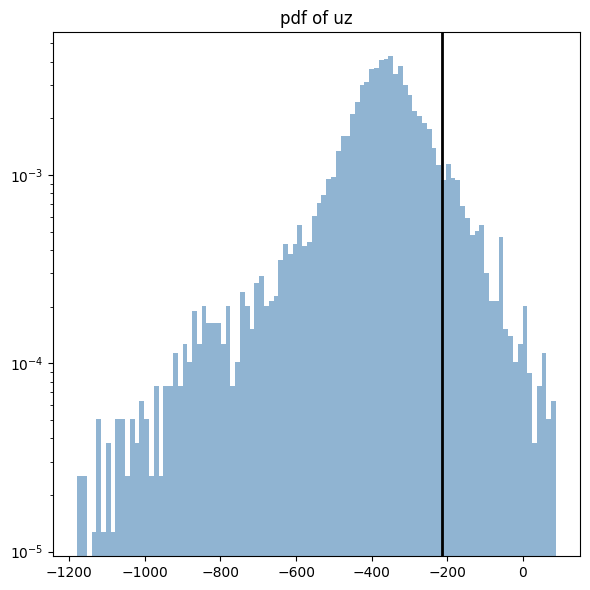

In [16]:
fig, ax = plt.subplots(figsize = (6,6))
ax.hist(uz, bins=100, density=True, alpha=0.6, color='steelblue', histtype = 'bar')
# ax.hist([uz[i] for i in min_indices], bins=20, density=True, alpha=0.6, color='orange',  histtype = 'bar')
ax.set_yscale('log')
ax.axvline(uz_mean, label = 'uzmean', c = 'k', linewidth = 2)
ax.set_title(f'pdf of uz')
plt.tight_layout()
plt.show()

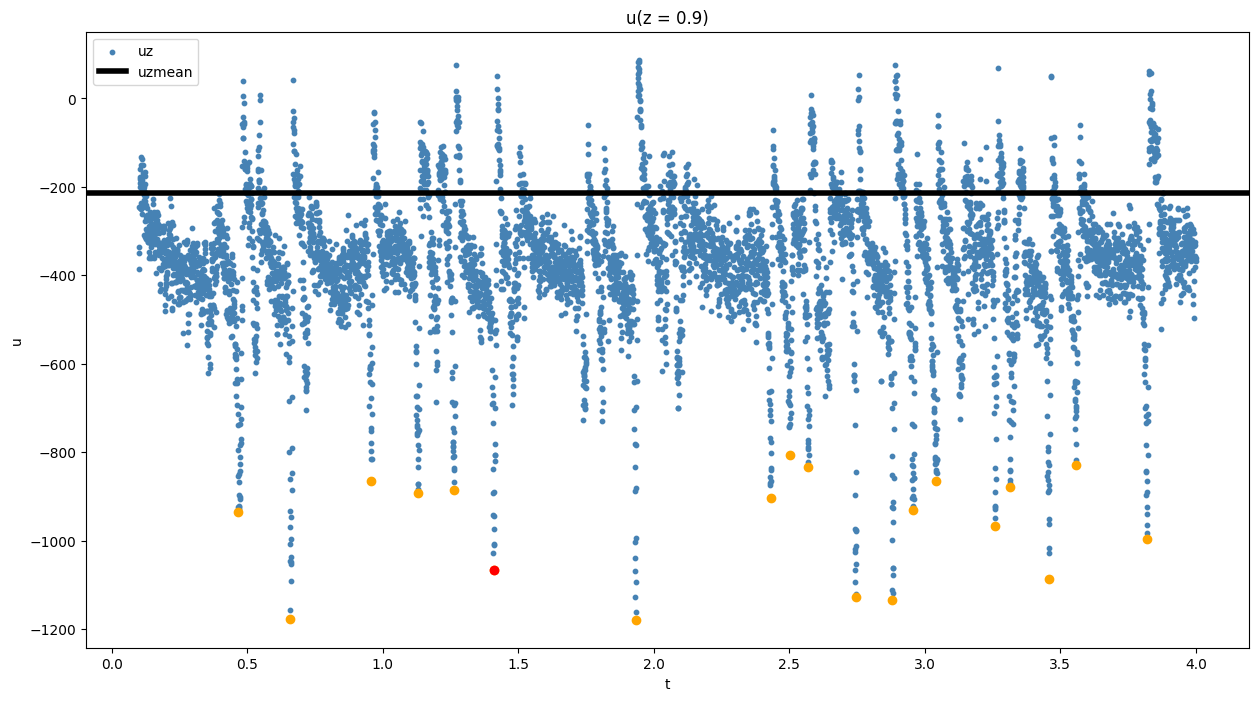

In [17]:
%matplotlib inline
fig,ax = plt.subplots(figsize = (15, 8))
i = 2091

ax.scatter(time, uz, s = 10, c = 'steelblue', label = 'uz')
ax.scatter([time[i] for i in min_indices], [uz[i] for i in min_indices], color = 'orange')
ax.scatter(time[i], uz[i], color = 'red')
# ax.scatter([time[i] for i in max_indices], [uz[i] for i in max_indices], color = 'deeppink')

ax.axhline(uz_mean, c = 'k', linewidth = 4, label = 'uzmean')
ax.set_title('u(z = 0.9)')
ax.set_ylabel('u')
ax.set_xlabel('t')
ax.legend()
# fig.tight_layout()
plt.show()

In [41]:
print(min_indices)
print(uz[4846])
print(max_indices)

[ 581  892 1369 1647 1859 2091 2924 3728 3844 3954 4230 4442 4570 4709
 5067 5159 5384 5543 5960]
-725.7162370293969
[  13  610  715  909 1385 1662 1795 1877 2116 2253 2645 2743 2950 3005
 3097 3147 3249 3747 3974 4091 4253 4460 4591 4719 4871 5011 5086 5219
 5402 5568 5972 6026]


1369, 1647,  : full swipe


In [ ]:
for t in min_indices:
    fig, ax = plt.subplots(figsize = (15,5))
    ax.streamplot(x.T, z.T, u[t,:,:].T , w[t,:,:].T, color = 'k', arrowsize = 0.7,linewidth = 1)
    cf0 = ax.contourf(x, z, T[t, :, :], levels=20, cmap=cm.Spectral.reversed(), norm=matplotlib.colors.Normalize(vmin=T.min(), vmax=T.max()))
    cbar = plt.colorbar(cf0, ax=ax, shrink=0.35, aspect = 6, ticks = [-0.04, 0, 0.05, 0.10, 0.15])
    cbar.ax.set_aspect('auto') 
    ax.set_title(f'Quiver plot at t = {t}')
    ax.set_aspect('equal')
    ax.set_ylim(0,1)
    ax.set_xlim(-4,4)
    plt.tight_layout()
    plt.show()

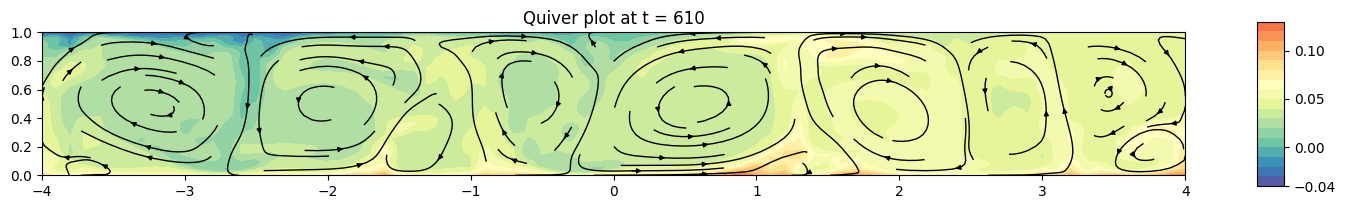

In [52]:
%matplotlib inline
t = 610
fig, ax = plt.subplots(figsize = (15,5))
ax.streamplot(x.T, z.T, u[t,:,:].T , w[t,:,:].T, color = 'k', arrowsize = 0.7,linewidth = 1)
cf0 = ax.contourf(x, z, T[t, :, :], levels=20, cmap=cm.Spectral.reversed(), norm=matplotlib.colors.Normalize(vmin=T.min(), vmax=T.max()))
cbar = plt.colorbar(cf0, ax=ax, shrink=0.35, aspect = 6, ticks = [-0.04, 0, 0.05, 0.10, 0.15])
cbar.ax.set_aspect('auto') 
ax.set_title(f'Quiver plot at t = {t}')
ax.set_aspect('equal')
ax.set_ylim(0,1)
ax.set_xlim(-4,4)
plt.tight_layout()
plt.show()

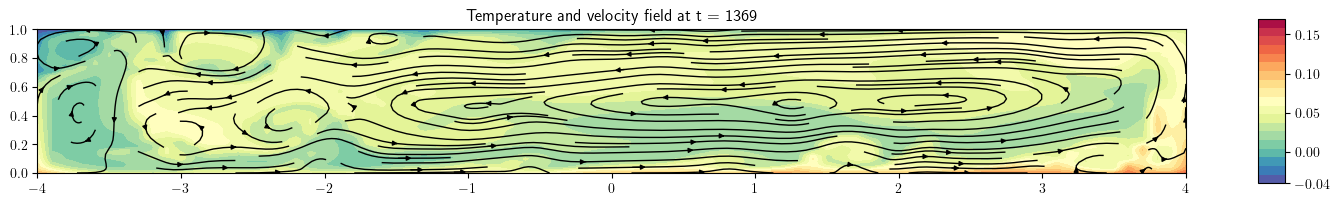

In [20]:
simulation.plot_field(1369)

In [24]:
simulation.save_clip(1350, 1400, '/home/julielimonet/Documents/Stage_M2/results/data_analysis/')

In [3]:
import cv2
import os

video_name = 'T_field.avi'
image_folder = '/home/julielimonet/Documents/Stage_M2/results/data_analysis/'
images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
images.sort()
img = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = img.shape

fps = 25
fourcc = cv2.VideoWriter_fourcc(*'XVID')  # You can also use other codecs like MJPG, X264, etc.
video = cv2.VideoWriter(video_name, fourcc, fps, (width, height))  # Adjust the frame rate (fps) as needed

# Loop through the images and add them to the video
for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

# Release the video object
video.release()

## Change integration boundaries

In [4]:
uz, uzmean = simulation.uz()

Intervalle d'intégration : [0.5        0.52       0.53999999 0.55999999 0.57999998 0.59999998
 0.61999998 0.63999997 0.65999997 0.67999996 0.69999996 0.71999996
 0.73999995 0.75999995 0.77999994 0.79999994 0.81999994 0.83999993
 0.85999993 0.87999992 0.89999992 0.91999992 0.93999991 0.95999991
 0.9799999  0.9999999 ]


In [5]:
KE = 0.5 * (simulation.u**2 + simulation.w**2)
print(np.shape(KE))
KE_mean = np.mean(KE, axis=(1, 2))
print(np.shape(KE_mean))

(6249, 81, 51)
(6249,)


In [4]:
from scipy.signal import find_peaks

min_indices = find_peaks(-uz, distance=50, height=500)[0]
max_indices = find_peaks(uz, distance=50, height=0)[0]

print(len(min_indices))
print(len(max_indices))

19
16


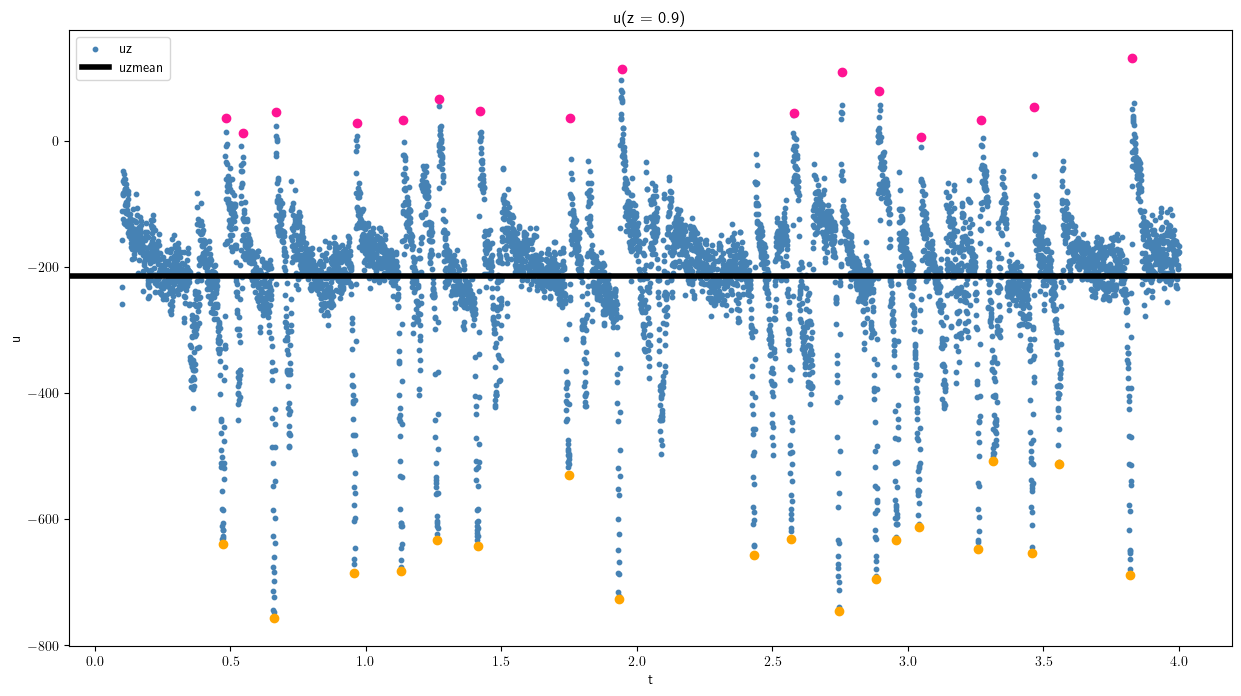

In [26]:
fig,ax = plt.subplots(figsize = (15, 8))
i = 2091

ax.scatter(time, uz, s = 10, c = 'steelblue', label = 'uz')
# ax.scatter(time, KE_mean, s = 10, c = 'orange', label = 'KE')
ax.scatter([time[i] for i in min_indices], [uz[i] for i in min_indices], color = 'orange')
# ax.scatter(time[i], uz[i], color = 'red')
ax.scatter([time[i] for i in max_indices], [uz[i] for i in max_indices], color = 'deeppink')
# ax.scatter([time[i] for i in max_indices], [KE_mean[i] for i in max_indices], color = 'deeppink')
# ax.scatter([time[i] for i in max_indices], [uz[i] for i in max_indices], color = 'deeppink')

ax.axhline(uzmean, c = 'k', linewidth = 4, label = 'uzmean')
# ax.axhline(born_sup, c = 'orange', linewidth = 4, label = 'uzmean')
# ax.axhline(born_inf, c = 'orange', linewidth = 4, label = 'uzmean')
ax.set_title('u(z = 0.9)')
ax.set_ylabel('u')
ax.set_xlabel('t')
ax.legend()
# fig.tight_layout()
plt.show()

## KE

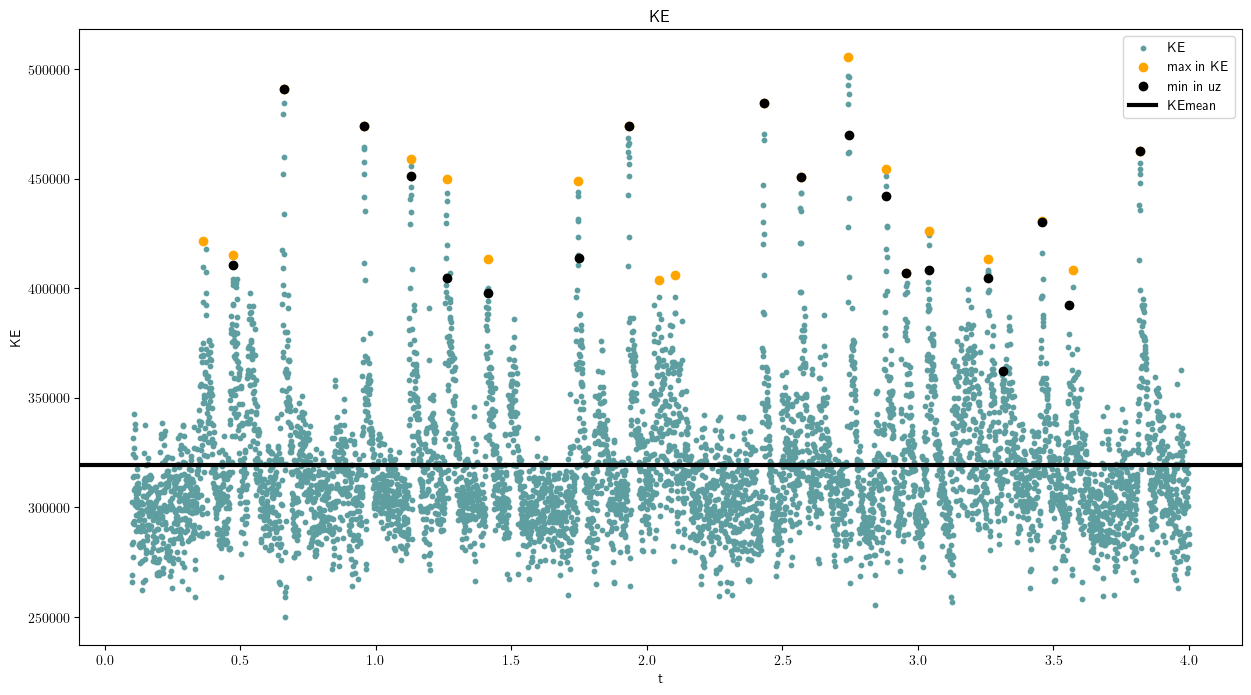

In [52]:
fig,ax = plt.subplots(figsize = (15, 8))
i = 2091

max_indicesKE = find_peaks(KE_mean, distance=50, height=400000)[0]


ax.scatter(time, KE_mean, s = 10, c = 'cadetblue', label = 'KE')

ax.scatter([time[i] for i in max_indicesKE], [KE_mean[i] for i in max_indicesKE], color = 'orange', label = 'max in KE')
ax.scatter([time[i] for i in min_indices], [KE_mean[i] for i in min_indices], color = 'k', label = 'min in uz')

ax.axhline(np.mean(KE), c = 'k', linewidth = 3, label = 'KEmean')
ax.set_title('KE')
ax.set_ylabel('KE')
ax.set_xlabel('t')
ax.legend()
# fig.tight_layout()
plt.show()

In [40]:
print(max_indicesKE)
print(min_indices)

[ 410  590  893 1368 1643 1858 2101 2624 2924 3110 3209 3728 3952 4226
 4447 4564 4706 5065 5384 5572 5959]
[ 591  893 1368 1648 1862 2097 2630 2924 3728 3952 4231 4445 4564 4704
 5067 5158 5383 5543 5959]


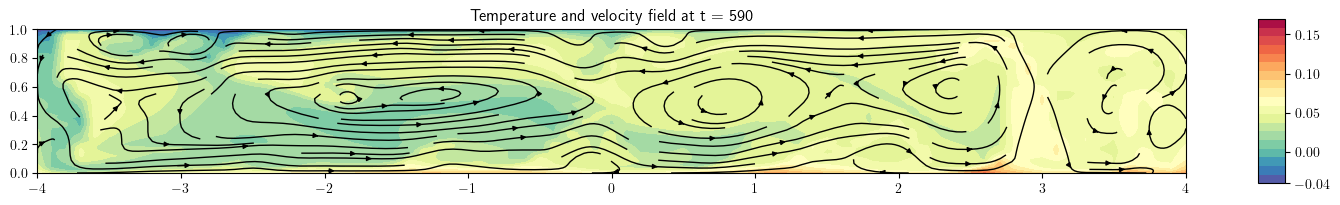

In [39]:
t = 590
simulation.plot_field(t)

## divergence

In [57]:
print(np.shape(simulation.x[:,0]))
print(np.shape(simulation.z[0,:]))
print(np.shape(simulation.u))

(81,)
(51,)
(6249, 81, 51)


In [17]:
div_x = np.gradient(simulation.u, simulation.x[:,0], axis = 1)
div_z = np.gradient(simulation.w, simulation.z[0,:], axis = 2)

div = simulation.divergence()
divmean = np.mean(div, axis = 0)

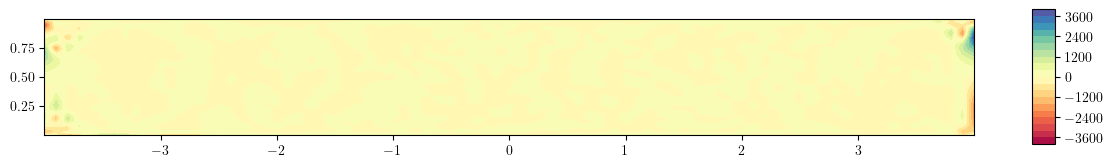

In [18]:
fig, ax = plt.subplots(figsize=(15, 5))
cf0 = ax.contourf(simulation.x, simulation.z, divmean, levels=20, cmap=cm.Spectral)
cbar = plt.colorbar(cf0, ax=ax, shrink=0.35, aspect=6)
cbar.ax.set_aspect("auto")
ax.set_aspect("equal")

## Frequency

In [22]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt


events = np.zeros(len(time[min_indices])) 


def sine_model(t, frequency, phase, amplitude, offset):
    return amplitude * np.sin(2 * np.pi * frequency * t + phase) + offset


popt, pcov = curve_fit(sine_model, time[min_indices], events)


frequency_fit, phase_fit, amplitude_fit, offset_fit = popt

In [20]:
times = time[min_indices]
f0 = 1/((times[-1]-times[0])/len(times))
f0_indices = 1/((min_indices[-1]-min_indices[0])/len(times))
print(f'La fréquance du phénomène est : {f0, f0_indices}')

La fréquance du phénomène est : (5.676160709663964, 0.003539493293591654)


In [15]:
print(len(times))

19


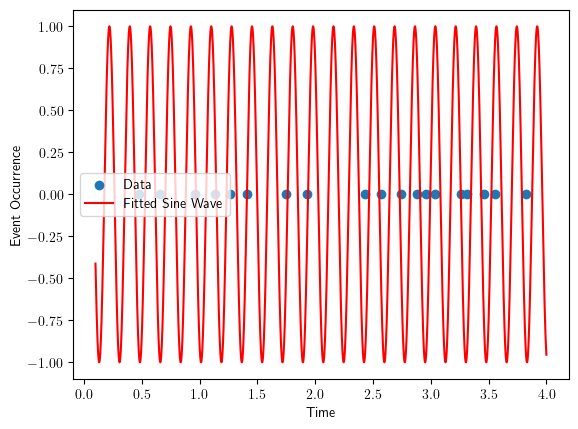

Optimal Frequency: 5.676160709663964


In [23]:
plt.scatter(times, events, label='Data')
plt.plot(time, sine_model(time, f0,0,1,0), color='red', label='Fitted Sine Wave')
plt.xlabel('Time')
plt.ylabel('Event Occurrence')
plt.legend()
plt.show()

print("Optimal Frequency:", f0)

# POD on the spikes and counterspikes

#### sampling

In [25]:
min_indices
max_indices

array([ 609,  715,  911, 1385, 1661, 1876, 2116, 2638, 2950, 3974, 4252,
       4468, 4719, 5085, 5402, 5972])

In [26]:
def sample_indices(min_indices, width):
    sample_indices = []
    for i in min_indices:
        for r in range(-width, width + 1):
            sample_indices.append(i + r)
    return sample_indices    

sample_spike_indices = sample_indices(min_indices, 3)
sample_counterspike_indices = sample_indices(max_indices, 3)
print(sample_spike_indices)

[588, 589, 590, 591, 592, 593, 594, 890, 891, 892, 893, 894, 895, 896, 1365, 1366, 1367, 1368, 1369, 1370, 1371, 1645, 1646, 1647, 1648, 1649, 1650, 1651, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 2094, 2095, 2096, 2097, 2098, 2099, 2100, 2627, 2628, 2629, 2630, 2631, 2632, 2633, 2921, 2922, 2923, 2924, 2925, 2926, 2927, 3725, 3726, 3727, 3728, 3729, 3730, 3731, 3949, 3950, 3951, 3952, 3953, 3954, 3955, 4228, 4229, 4230, 4231, 4232, 4233, 4234, 4442, 4443, 4444, 4445, 4446, 4447, 4448, 4561, 4562, 4563, 4564, 4565, 4566, 4567, 4701, 4702, 4703, 4704, 4705, 4706, 4707, 5064, 5065, 5066, 5067, 5068, 5069, 5070, 5155, 5156, 5157, 5158, 5159, 5160, 5161, 5380, 5381, 5382, 5383, 5384, 5385, 5386, 5540, 5541, 5542, 5543, 5544, 5545, 5546, 5956, 5957, 5958, 5959, 5960, 5961, 5962]


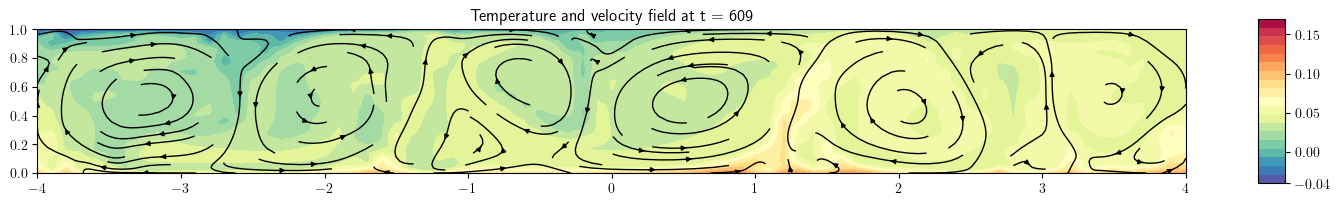

In [146]:
simulation.plot_field(609)

In [70]:
len(sample_spike_indices)

133

#### POD

In [47]:
import POD
importlib.reload(POD)

<module 'POD' from '/home/julielimonet/Documents/Stage_M2/code/POD.py'>

##### Spikes

In [48]:
from data_analysis import Simulation
current_directory = '/home/julielimonet/Documents/Stage_M2/'

sampled_simulation = Simulation(current_directory)
time, x, z, u, w, T, umean, wmean = sampled_simulation.import_data()
sampled_simulation.time = time[sample_spike_indices]
sampled_simulation.time = T[sample_spike_indices, : ,:]


simulation.ticks = [-0.04, 0, 0.05, 0.10, 0.15]

h, l = np.shape(x)
m = len(time)

In [49]:
from POD import POD
from POD import KE_modes_two_components
from POD import KE_modes

U = np.reshape(simulation.u - simulation.umean, (m, h * l))
W = np.reshape(simulation.w - simulation.wmean, (m, h * l))

U_sample = U[sample_spike_indices, :]
W_sample = W[sample_spike_indices, :]
UW_sample = np.concatenate([U_sample, W_sample], axis = 0)

num_modes = len(sample_spike_indices)
modes_u, eigvals_u, eigvecs_u, proj_coef_u = POD(U_sample, h, l, num_modes)
modes_w, eigvals_w, eigvecs_w, proj_coef_w = POD(W_sample, h, l, num_modes)
modes_uw, eigvals_uw, eigvecs_uw, proj_coef_uw = POD(UW_sample, h, l, 2*num_modes)

KE_modes_all = KE_modes_two_components(eigvals_u, eigvals_w, num_modes)
KE_modes_u = KE_modes(eigvals_u, num_modes)
KE_modes_w = KE_modes(eigvals_w, num_modes)
KE_modes_uw = KE_modes(eigvals_uw, num_modes)

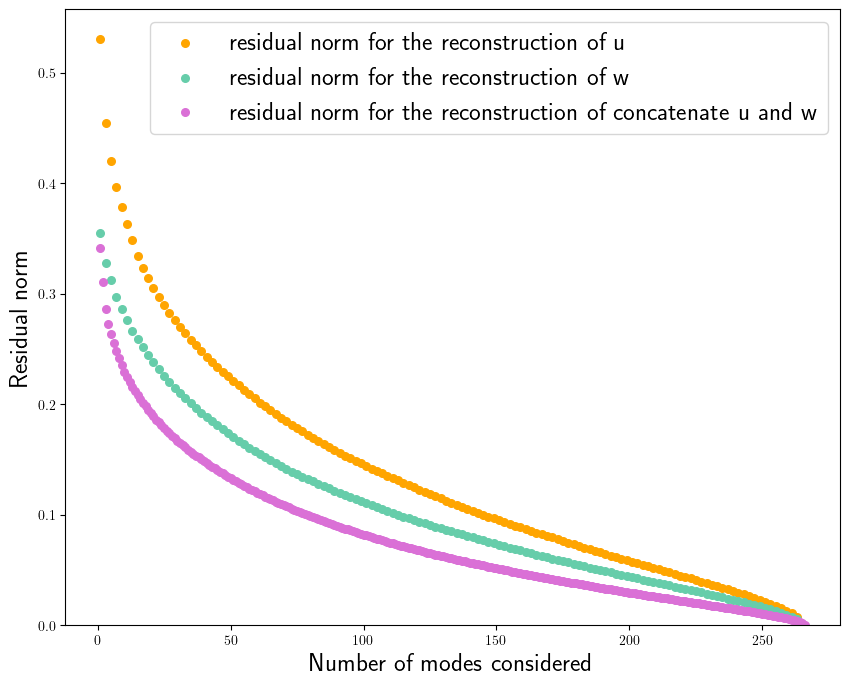

In [53]:
from POD import residuals
residuals_spikes_u = residuals(proj_coef_u, modes_u, len(sample_spike_indices), U_sample)
residuals_spikes_w = residuals(proj_coef_w, modes_w, len(sample_spike_indices), W_sample)
residuals_spikes_uw = residuals(proj_coef_uw, modes_uw, len(2*sample_spike_indices), UW_sample)

%matplotlib inline
fig,ax = plt.subplots(figsize = (10, 8))

N_modes = np.arange(1, 2*num_modes + 1, step = 2)
N_modes2 = np.arange(1, 2*num_modes + 1, step = 1)

ax.scatter(N_modes, residuals_spikes_u, s = 30, c = 'orange', label = r"residual norm for the reconstruction of u")
ax.scatter(N_modes, residuals_spikes_w, s = 30, c = 'mediumaquamarine', label = r"residual norm for the reconstruction of w")
ax.scatter(N_modes2, residuals_spikes_uw, s = 30, c = 'orchid', label = r"residual norm for the reconstruction of concatenate u and w")
# ax.set_title(r"Residual norm")
ax.set_ylabel('Residual norm', fontsize = fontsize)
ax.set_ylim(bottom = 0)
ax.set_xlabel('Number of modes considered', fontsize = fontsize)
ax.legend(fontsize = fontsize)
plt.show()

In [236]:
len([residuals_spikes_u])

1

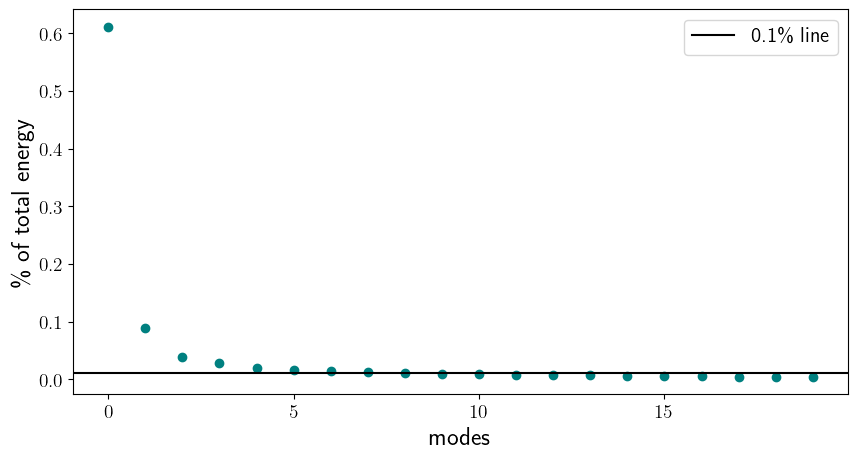

In [204]:
from POD import plot_energy_contribution
j = 20
plot_energy_contribution(KE_modes_all, j, fontsize)
plt.show()
# plt.savefig('../results/pureRB/energy_contribution', dpi=300)

In [205]:
print(np.shape(np.mean(sampled_simulation.u, axis = 0)))

(81, 51)


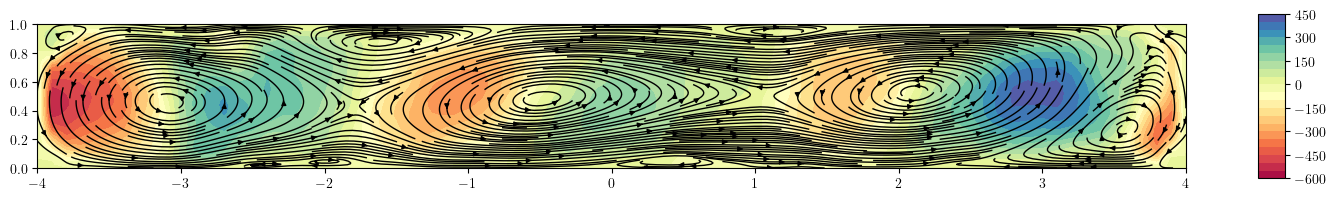

In [206]:
sampled_simulation.u = np.reshape(U_sample, (len(sample_spike_indices), h, l))
sampled_simulation.w = np.reshape(W_sample, (len(sample_spike_indices), h, l))
sampled_simulation.umean = np.mean(sampled_simulation.u, axis = 0)
sampled_simulation.wmean = np.mean(sampled_simulation.w, axis = 0)

sampled_simulation.plot_meanfield(map = 'wmean')


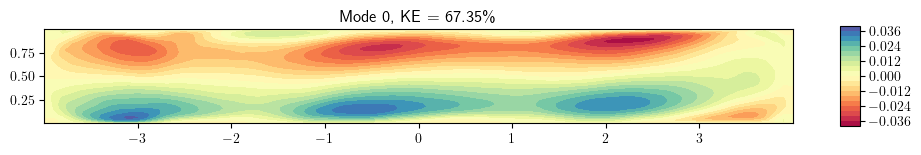

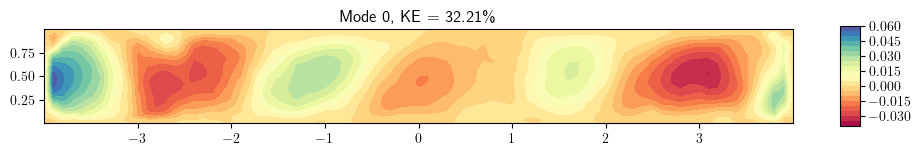

In [257]:
j = 0

modes_u = np.reshape(modes_u, (h,l,num_modes))
modes_w = np.reshape(modes_w, (h,l,num_modes))

from POD import plot_map_mode

plot_map_mode(modes_u, KE_modes_u, j, x, z)
plt.tight_layout()

plot_map_mode(modes_w, KE_modes_w, j, x, z)
plt.tight_layout()
plt.show()
%matplotlib inline

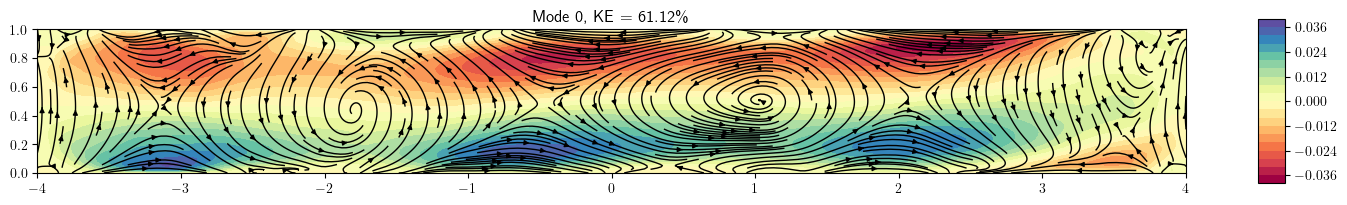

In [258]:
j = 0

from POD import streamplot_mode

streamplot_mode(modes_u, modes_w, modes_u, KE_modes_all, j, x, z)
plt.tight_layout()
plt.show()
%matplotlib inline

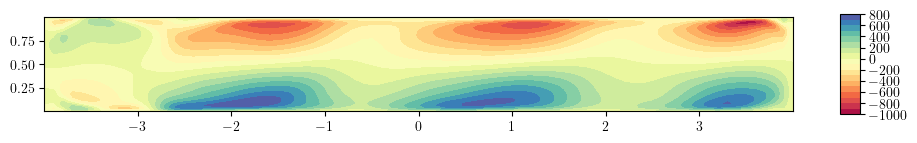

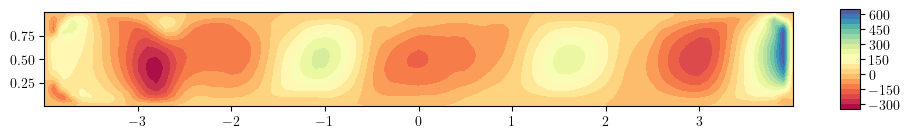

In [259]:
sampled_simulation.plot_meancomponent('u')
plt.tight_layout()

sampled_simulation.plot_meancomponent('w')
plt.tight_layout()
plt.show()

##### Counter spikes

In [260]:
from data_analysis import Simulation
current_directory = '/home/julielimonet/Documents/Stage_M2/'

sampled_simulation = Simulation(current_directory)
time, x, z, u, w, T, umean, wmean = sampled_simulation.import_data()
sampled_simulation.time = time[sample_counterspike_indices]
sampled_simulation.time = T[sample_counterspike_indices, : ,:]


simulation.ticks = [-0.04, 0, 0.05, 0.10, 0.15]

h, l = np.shape(x)
m = len(time)

In [261]:
from POD import POD
from POD import KE_modes_two_components
from POD import KE_modes

U = np.reshape(simulation.u - simulation.umean, (m, h * l))
W = np.reshape(simulation.w - simulation.wmean, (m, h * l))

U_sample = U[sample_counterspike_indices, :]
W_sample = W[sample_counterspike_indices, :]


num_modes = len(sample_counterspike_indices)
modes_u, eigvals_u, eigvecs_u, proj_coef_u = POD(U_sample, h, l, num_modes)
modes_w, eigvals_w, eigvecs_w, proj_coef_w = POD(W_sample, h, l, num_modes)

KE_modes_all = KE_modes_two_components(eigvals_u, eigvals_w, num_modes)
KE_modes_u = KE_modes(eigvals_u, num_modes)
KE_modes_w = KE_modes(eigvals_w, num_modes)

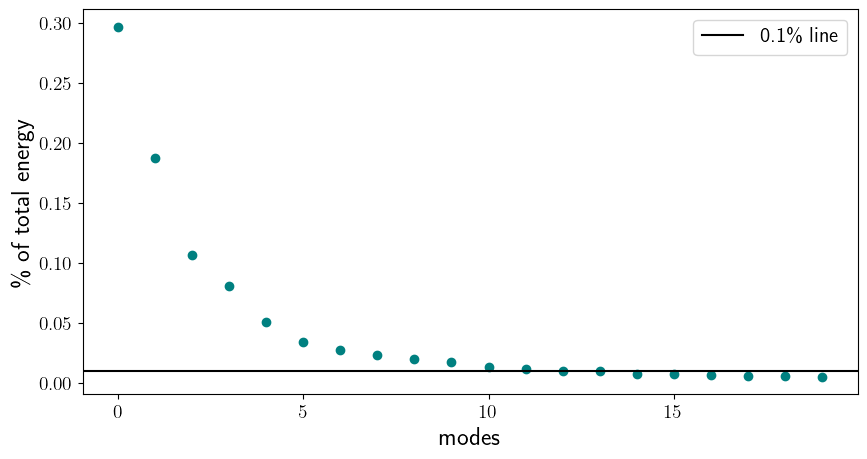

In [212]:
from POD import plot_energy_contribution
j = 20
plot_energy_contribution(KE_modes_all, j, fontsize)
plt.show()
# plt.savefig('../results/pureRB/energy_contribution', dpi=300)

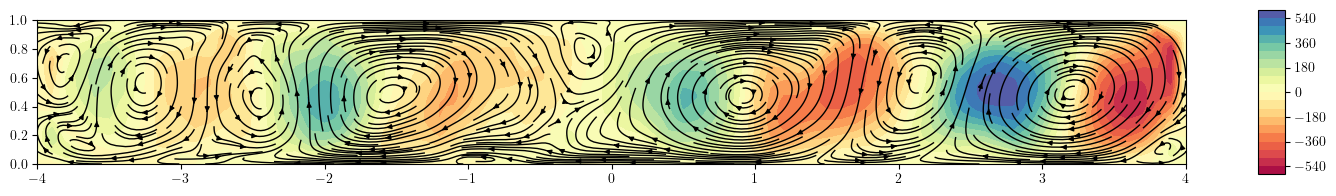

In [213]:
sampled_simulation.u = np.reshape(U_sample, (len(sample_counterspike_indices), h, l))
sampled_simulation.w = np.reshape(W_sample, (len(sample_counterspike_indices), h, l))
sampled_simulation.umean = np.mean(sampled_simulation.u, axis = 0)
sampled_simulation.wmean = np.mean(sampled_simulation.w, axis = 0)

sampled_simulation.plot_meanfield(map = 'wmean')

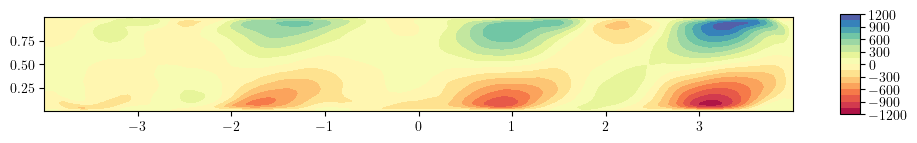

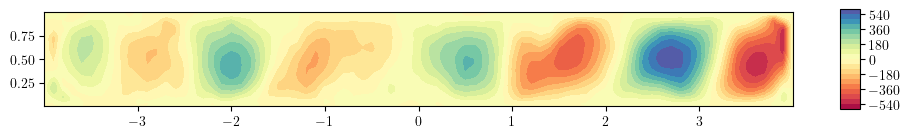

In [214]:
sampled_simulation.plot_meancomponent('u')
plt.tight_layout()

sampled_simulation.plot_meancomponent('w')
plt.tight_layout()
plt.show()

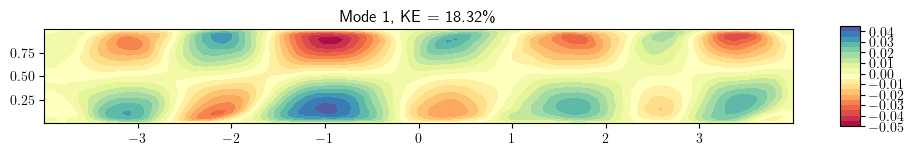

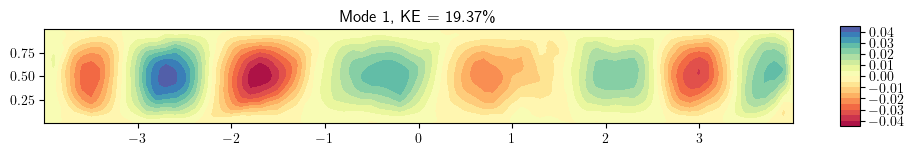

In [262]:
j = 1

modes_u = np.reshape(modes_u, (h,l,num_modes))
modes_w = np.reshape(modes_w, (h,l,num_modes))

from POD import plot_map_mode

plot_map_mode(modes_u, KE_modes_u, j, x, z)
plt.tight_layout()

plot_map_mode(modes_w, KE_modes_w, j, x, z)
plt.tight_layout()
plt.show()
%matplotlib inline

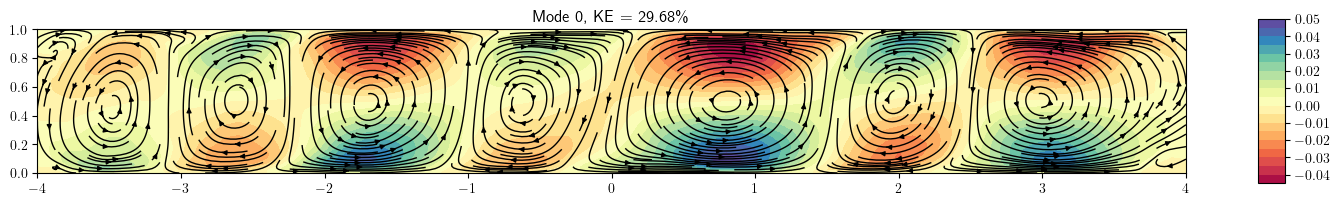

In [216]:
j = 0

from POD import streamplot_mode

streamplot_mode(modes_u, modes_w, modes_u, KE_modes_all, j, x, z)
plt.tight_layout()
plt.show()
%matplotlib inline

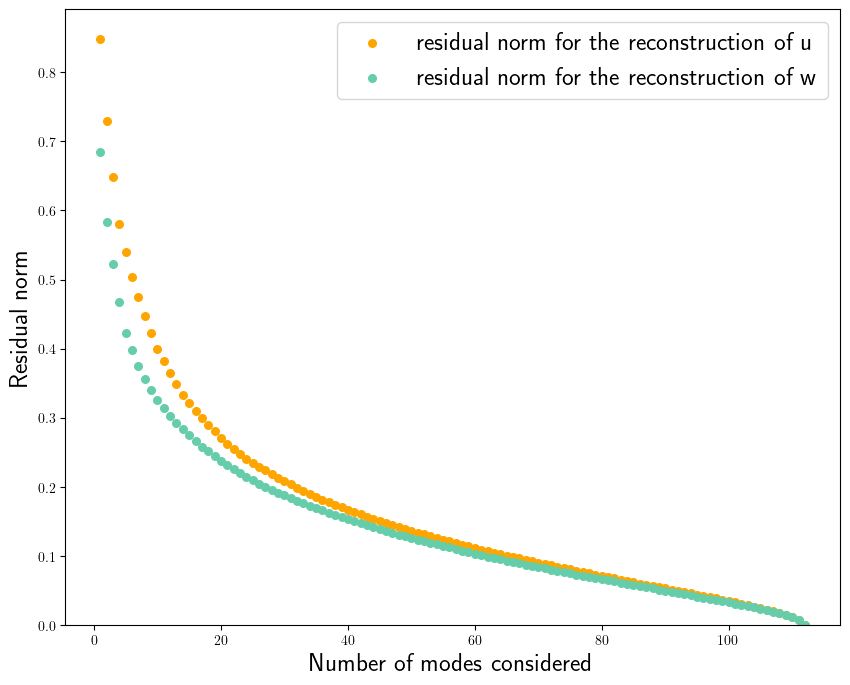

In [248]:
from POD import residuals
residuals_counterspikes_u = residuals(proj_coef_u, modes_u, len(sample_counterspike_indices), umean, U_sample)
residuals_counterspikes_w = residuals(proj_coef_w, modes_w, len(sample_counterspike_indices), wmean, W_sample)

%matplotlib inline
fig,ax = plt.subplots(figsize = (10, 8))

N_modes = np.arange(1, num_modes + 1, step = 1)

ax.scatter(N_modes, residuals_counterspikes_u, s = 30, c = 'orange', label = r"residual norm for the reconstruction of u")
ax.scatter(N_modes, residuals_counterspikes_w, s = 30, c = 'mediumaquamarine', label = r"residual norm for the reconstruction of w")
# ax.set_title(r"Residual norm")
ax.set_ylabel('Residual norm', fontsize = fontsize)
ax.set_ylim(bottom = 0)
ax.set_xlabel('Number of modes considered', fontsize = fontsize)
ax.legend(fontsize = fontsize)
plt.show()

##### around mean

In [249]:
born_inf = uz_mean + np.var(uz)/uz_mean
born_sup = uz_mean - np.var(uz)/uz_mean
sample_mean_indices = [i for i in range(len(uz)) if born_inf < uz[i] < born_sup]

In [218]:
print(sample_mean_indices)

[0, 1, 2, 51, 52, 53, 56, 59, 60, 63, 67, 68, 70, 71, 72, 75, 78, 79, 84, 85, 86, 87, 92, 93, 95, 96, 97, 98, 99, 100, 108, 109, 110, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 125, 126, 127, 128, 129, 131, 132, 133, 135, 136, 139, 140, 141, 142, 143, 144, 145, 146, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 168, 169, 170, 171, 173, 176, 177, 178, 179, 180, 184, 185, 186, 187, 188, 189, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 299, 300, 301, 302, 303, 304, 3

In [250]:
from data_analysis import Simulation
current_directory = '/home/julielimonet/Documents/Stage_M2/'

sampled_simulation = Simulation(current_directory)
time, x, z, u, w, T, umean, wmean = sampled_simulation.import_data()
sampled_simulation.time = time[sample_mean_indices]
sampled_simulation.time = T[sample_mean_indices, : ,:]


simulation.ticks = [-0.04, 0, 0.05, 0.10, 0.15]

h, l = np.shape(x)
m = len(time)

In [251]:
from POD import POD
from POD import KE_modes_two_components
from POD import KE_modes

U = np.reshape(simulation.u - simulation.umean, (m, h * l))
W = np.reshape(simulation.w - simulation.wmean, (m, h * l))

U_sample = U[sample_mean_indices, :]
W_sample = W[sample_mean_indices, :]


num_modes = len(sample_mean_indices)
modes_u, eigvals_u, eigvecs_u, proj_coef_u = POD(U_sample, h, l, num_modes)
modes_w, eigvals_w, eigvecs_w, proj_coef_w = POD(W_sample, h, l, num_modes)

KE_modes_all = KE_modes_two_components(eigvals_u, eigvals_w, num_modes)
KE_modes_u = KE_modes(eigvals_u, num_modes)
KE_modes_w = KE_modes(eigvals_w, num_modes)

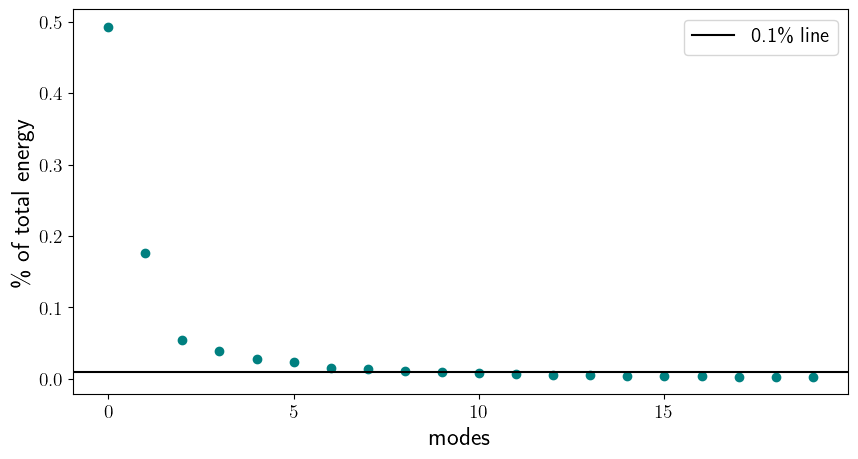

In [221]:
from POD import plot_energy_contribution
j = 20
plot_energy_contribution(KE_modes_all, j, fontsize)
plt.show()
# plt.savefig('../results/pureRB/energy_contribution', dpi=300)

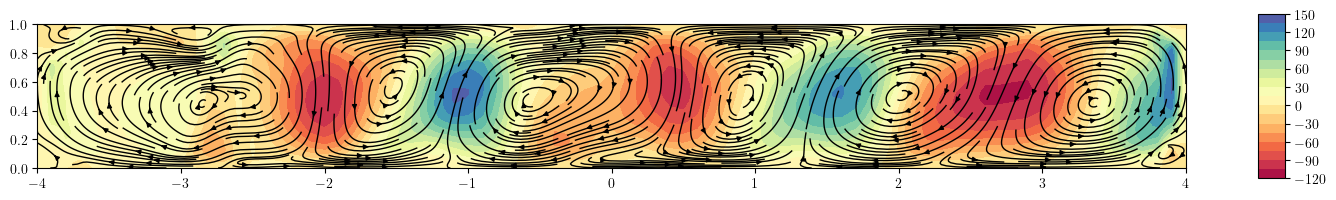

In [222]:
sampled_simulation.u = np.reshape(U_sample, (len(sample_mean_indices), h, l))
sampled_simulation.w = np.reshape(W_sample, (len(sample_mean_indices), h, l))
sampled_simulation.umean = np.mean(sampled_simulation.u, axis = 0)
sampled_simulation.wmean = np.mean(sampled_simulation.w, axis = 0)

sampled_simulation.plot_meanfield(map = 'wmean')

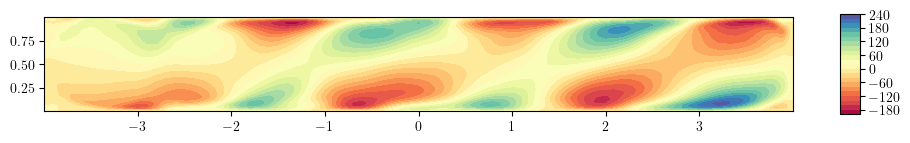

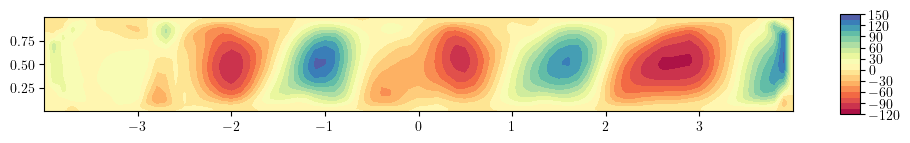

In [223]:
sampled_simulation.plot_meancomponent('u')
plt.tight_layout()

sampled_simulation.plot_meancomponent('w')
plt.tight_layout()
plt.show()

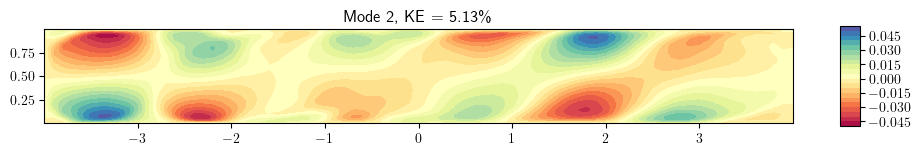

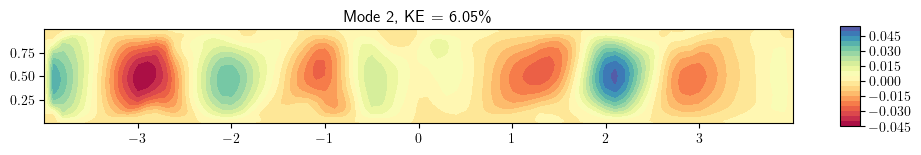

In [224]:
j = 2

modes_u = np.reshape(modes_u, (h,l,num_modes))
modes_w = np.reshape(modes_w, (h,l,num_modes))

from POD import plot_map_mode

plot_map_mode(modes_u, KE_modes_u, j, x, z)
plt.tight_layout()

plot_map_mode(modes_w, KE_modes_w, j, x, z)
plt.tight_layout()
plt.show()
%matplotlib inline

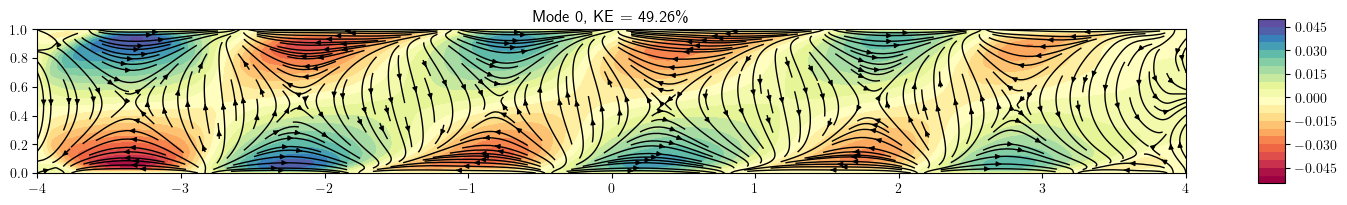

In [225]:
j = 0

from POD import streamplot_mode

streamplot_mode(modes_u, modes_w, modes_u, KE_modes_all, j, x, z)
plt.tight_layout()
plt.show()
%matplotlib inline

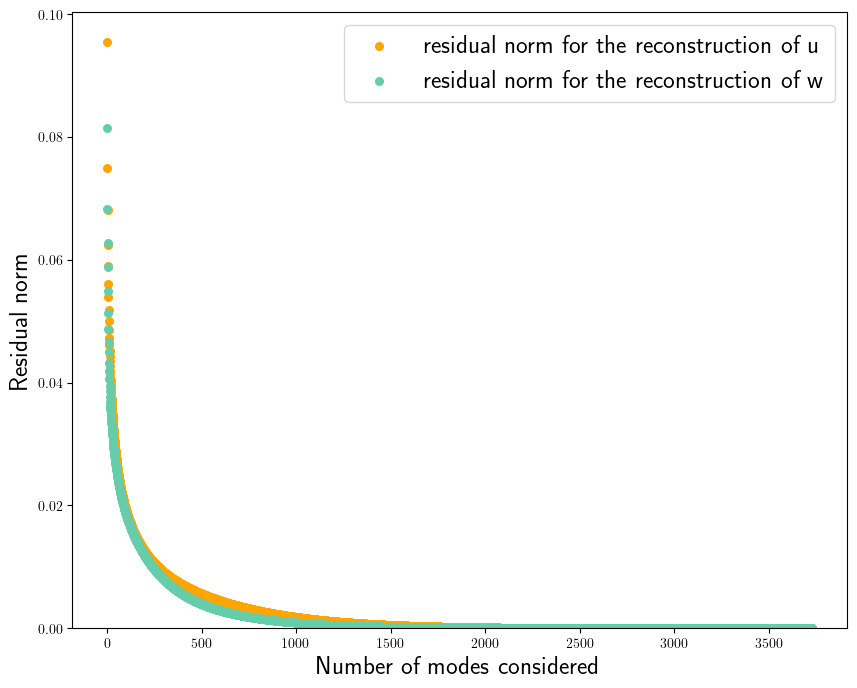

In [252]:
from POD import residuals
residuals_mean_u = residuals(proj_coef_u, modes_u, len(sample_mean_indices), umean, U_sample)
residuals_mean_w = residuals(proj_coef_w, modes_w, len(sample_mean_indices), wmean, W_sample)

%matplotlib inline
fig,ax = plt.subplots(figsize = (10, 8))

N_modes = np.arange(1, num_modes + 1, step = 1)

ax.scatter(N_modes, residuals_mean_u, s = 30, c = 'orange', label = r"residual norm for the reconstruction of u")
ax.scatter(N_modes, residuals_mean_w, s = 30, c = 'mediumaquamarine', label = r"residual norm for the reconstruction of w")
# ax.set_title(r"Residual norm")
ax.set_ylabel('Residual norm', fontsize = fontsize)
ax.set_ylim(bottom = 0)
ax.set_xlabel('Number of modes considered', fontsize = fontsize)
ax.legend(fontsize = fontsize)
plt.show()

# plot attracteurs

In [226]:
Tmean = np.mean(np.reshape(T, (m,h*l)), axis = 1)
print(np.shape(Tmean))

(6249,)


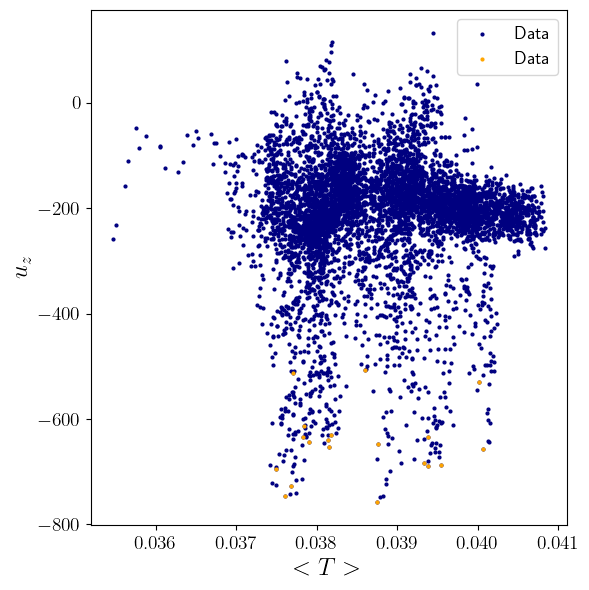

In [227]:

fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(Tmean, uz, color='navy', s=4, label="Data")
ax.scatter([Tmean[i] for i in min_indices], [uz[i] for i in min_indices], color='orange', s=4, label="Data")

ax.set_xlabel(r"$<T>$", fontsize=fontsize)
ax.set_ylabel(r"$u_z$", fontsize=fontsize)
# ax.set_aspect('equal')
ax.legend(fontsize=fontsize-5)
ax.tick_params(axis='both', labelsize=fontsize-4)

plt.tight_layout()
plt.show()
# plt.savefig('../results/POD/example', dpi=300)